# Speech Emotion Recognition With Convolutional Neural Network

# Content
1. [Including Libraries](#1)
2. [Including the Datasets](#2)
3. [Data Analyze](#3)
    * [Audio Augmentation](#7)
        * [Original Audio](#4)
        * [Noised Audio](#8)
        * [Streched Audio](#10)
        * [Shifted Audio](#11)
        * [Pitched Audio](#12)
    * [Feature Extraction](#13)
    * [Processing](#14)
4. [Including Analyzed Audio Features](#15)
5. [Processing Analyzed Data for Training](#16)
    * [Train, Test and Validation Spliting](#17)
    * [Tuning for Training](#18)
6. [Begin Training](#19)
7. [Drawing Charts](#20)
    * [Accuracy Charts](#21)
    * [Loss Charts](#22)
8. [Testing Model and Test Results](#24)
    * [Confusion Matrix](#25)

<a id="1"></a>
# Including Libraries

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import IPython
import tensorflow.keras.layers as L
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import re
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


import os



/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


<a id="2"></a>
# Including the Datasets

In [2]:
Crema_Path='../input/speech-emotion-recognition-en/Crema/'
Ravdess_Path='../input/speech-emotion-recognition-en/Ravdess/audio_speech_actors_01-24'
Savee_Path='../input/speech-emotion-recognition-en/Savee/'
Tess_Path='../input/speech-emotion-recognition-en/Tess/'

<a id="3"></a>
# Data Analyze

In [3]:
crema=[]
for wav in os.listdir(Crema_Path):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        crema.append(('sad',Crema_Path+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('angry',Crema_Path+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('disgust',Crema_Path+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('fear',Crema_Path+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('happy',Crema_Path+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('neutral',Crema_Path+'/'+wav))
    else:
        crema.append(('unknown',Crema_Path+'/'+wav))
Crema_df=pd.DataFrame.from_dict(crema)
Crema_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Crema_df.head()

,Emotion,File_Path
0,disgust,../input/speech-emotion-recognition-en/Crema//...
1,happy,../input/speech-emotion-recognition-en/Crema//...
2,happy,../input/speech-emotion-recognition-en/Crema//...
3,disgust,../input/speech-emotion-recognition-en/Crema//...
4,disgust,../input/speech-emotion-recognition-en/Crema//...


In [4]:
Crema_df['Emotion'].unique()

array(['disgust', 'happy', 'sad', 'neutral', 'fear', 'angry'],
      dtype=object)

In [5]:
ravdess=[]
for directory in os.listdir(Ravdess_Path):
    actors=os.listdir(os.path.join(Ravdess_Path,directory))
    for wav in actors:
        emotion=wav.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        ravdess.append((emotion_number,os.path.join(Ravdess_Path,directory,wav)))
Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head()

,Emotion,File_Path
0,surprise,../input/speech-emotion-recognition-en/Ravdess...
1,neutral,../input/speech-emotion-recognition-en/Ravdess...
2,disgust,../input/speech-emotion-recognition-en/Ravdess...
3,disgust,../input/speech-emotion-recognition-en/Ravdess...
4,neutral,../input/speech-emotion-recognition-en/Ravdess...


In [6]:
Ravdess_df['Emotion'].unique()

array(['surprise', 'neutral', 'disgust', 'fear', 'sad', 'happy', 'angry'],
      dtype=object)

In [7]:
savee=[]
for wav in os.listdir(Savee_Path):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        savee.append(('angry',Savee_Path+'/'+wav))
    elif emotion=='d':
        savee.append(('disgust',Savee_Path+'/'+wav))
    elif emotion=='f':
        savee.append(('fear',Savee_Path+'/'+wav))
    elif emotion=='h':
        savee.append(('happy',Savee_Path+'/'+wav))
    elif emotion=='n':
        savee.append(('neutral',Savee_Path+'/'+wav))
    elif emotion=='sa':
        savee.append(('sad',Savee_Path+'/'+wav))
    elif emotion=='su':
        savee.append(('surprise',Savee_Path+'/'+wav))
Savee_df=pd.DataFrame.from_dict(savee)
Savee_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Savee_df.head()

,Emotion,File_Path
0,happy,../input/speech-emotion-recognition-en/Savee//...
1,fear,../input/speech-emotion-recognition-en/Savee//...
2,happy,../input/speech-emotion-recognition-en/Savee//...
3,disgust,../input/speech-emotion-recognition-en/Savee//...
4,angry,../input/speech-emotion-recognition-en/Savee//...


In [8]:
Savee_df['Emotion'].unique()

array(['happy', 'fear', 'disgust', 'angry', 'surprise', 'neutral', 'sad'],
      dtype=object)

In [9]:
tess=[]
for directory in os.listdir(Tess_Path):
    for wav in os.listdir(os.path.join(Tess_Path,directory)):
        emotion=wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            tess.append(('surprise',os.path.join(Tess_Path,directory,wav)))
        else:
            tess.append((emotion[2],os.path.join(Tess_Path,directory,wav)))
Tess_df=pd.DataFrame.from_dict(tess)
Tess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Tess_df.head()

,Emotion,File_Path
0,fear,../input/speech-emotion-recognition-en/Tess/YA...
1,fear,../input/speech-emotion-recognition-en/Tess/YA...
2,fear,../input/speech-emotion-recognition-en/Tess/YA...
3,fear,../input/speech-emotion-recognition-en/Tess/YA...
4,fear,../input/speech-emotion-recognition-en/Tess/YA...


In [10]:
Tess_df['Emotion'].unique()

array(['fear', 'angry', 'disgust', 'neutral', 'sad', 'surprise', 'happy'],
      dtype=object)

In [11]:
main_df=pd.concat([Crema_df,Ravdess_df,Savee_df,Tess_df],axis=0)
main_df.shape

(12162, 2)

In [12]:
main_df.head(15)

,Emotion,File_Path
0,disgust,../input/speech-emotion-recognition-en/Crema//...
1,happy,../input/speech-emotion-recognition-en/Crema//...
2,happy,../input/speech-emotion-recognition-en/Crema//...
3,disgust,../input/speech-emotion-recognition-en/Crema//...
4,disgust,../input/speech-emotion-recognition-en/Crema//...
5,disgust,../input/speech-emotion-recognition-en/Crema//...
6,happy,../input/speech-emotion-recognition-en/Crema//...
7,sad,../input/speech-emotion-recognition-en/Crema//...
8,disgust,../input/speech-emotion-recognition-en/Crema//...
9,sad,../input/speech-emotion-recognition-en/Crema//...


In [13]:
main_df.tail(15)

,Emotion,File_Path
2785,surprise,../input/speech-emotion-recognition-en/Tess/YA...
2786,surprise,../input/speech-emotion-recognition-en/Tess/YA...
2787,surprise,../input/speech-emotion-recognition-en/Tess/YA...
2788,surprise,../input/speech-emotion-recognition-en/Tess/YA...
2789,surprise,../input/speech-emotion-recognition-en/Tess/YA...
2790,surprise,../input/speech-emotion-recognition-en/Tess/YA...
2791,surprise,../input/speech-emotion-recognition-en/Tess/YA...
2792,surprise,../input/speech-emotion-recognition-en/Tess/YA...
2793,surprise,../input/speech-emotion-recognition-en/Tess/YA...
2794,surprise,../input/speech-emotion-recognition-en/Tess/YA...


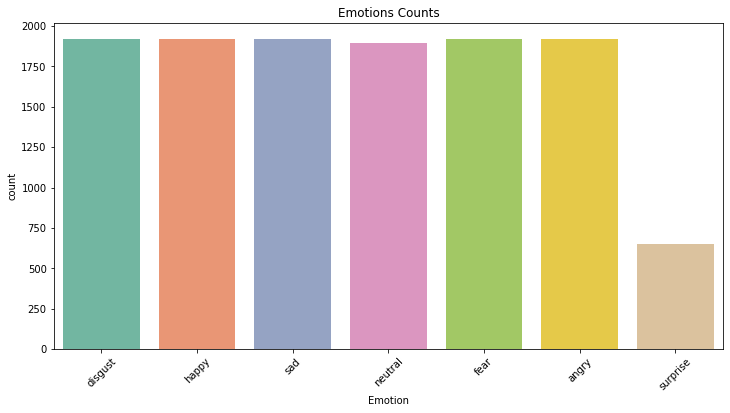

In [14]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=main_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

In [15]:
emotion_names=main_df['Emotion'].unique()

In [16]:
colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

In [17]:
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)

In [18]:
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')

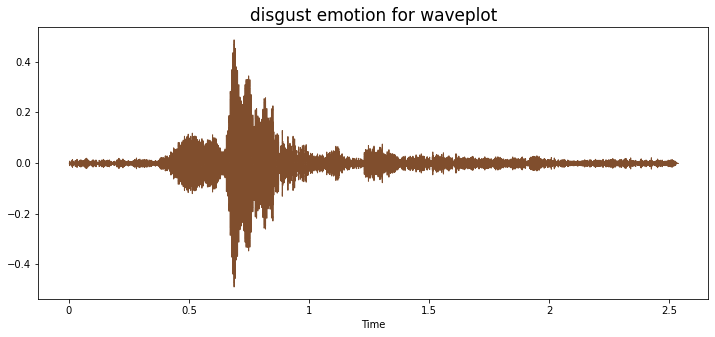

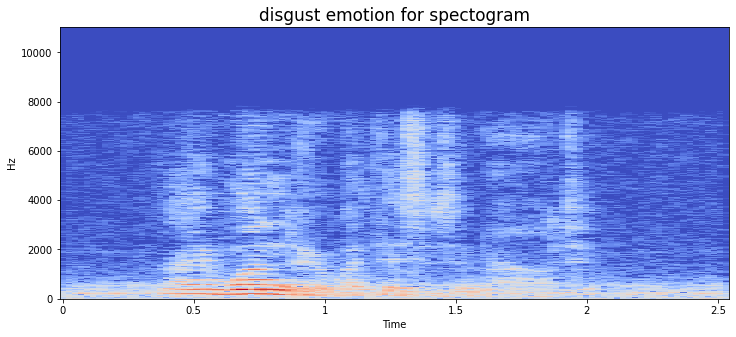

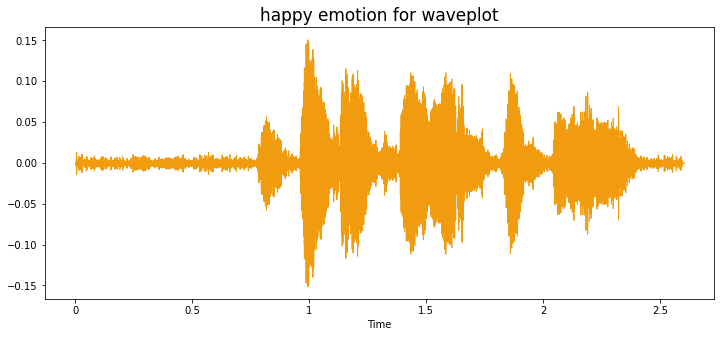

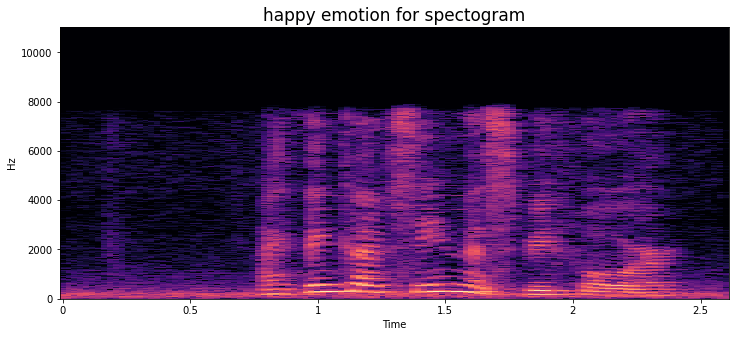

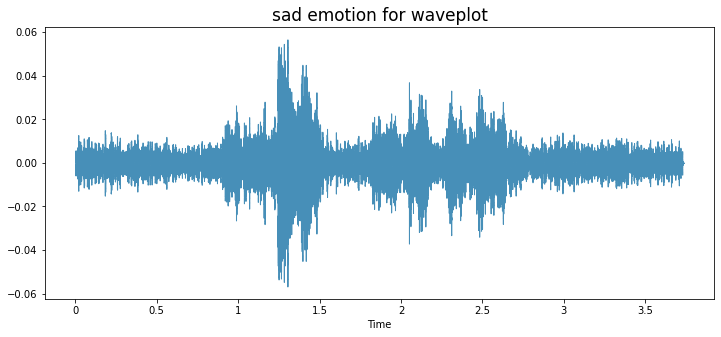

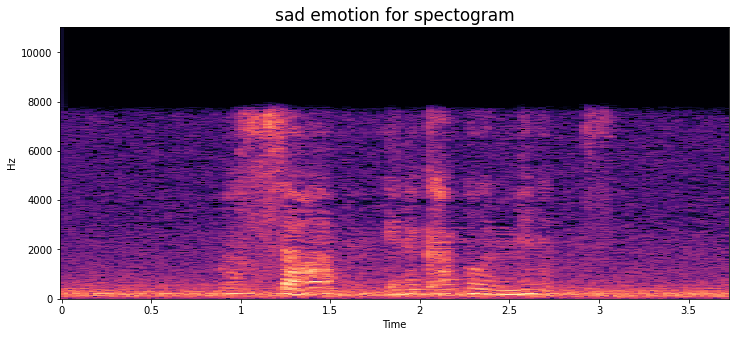

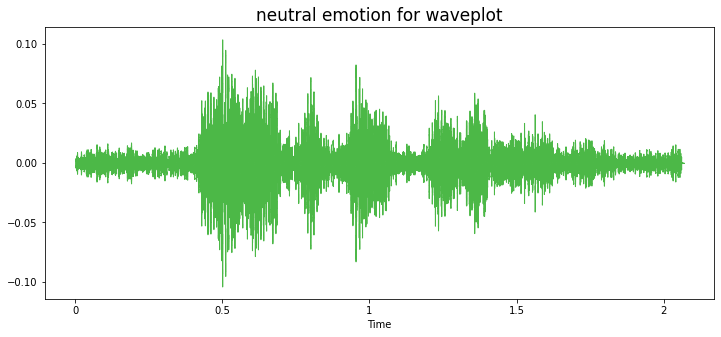

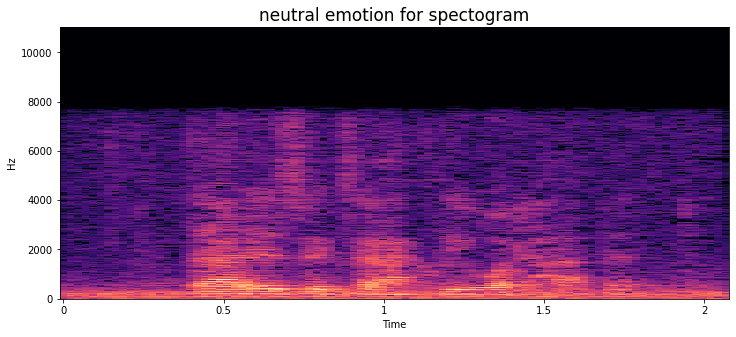

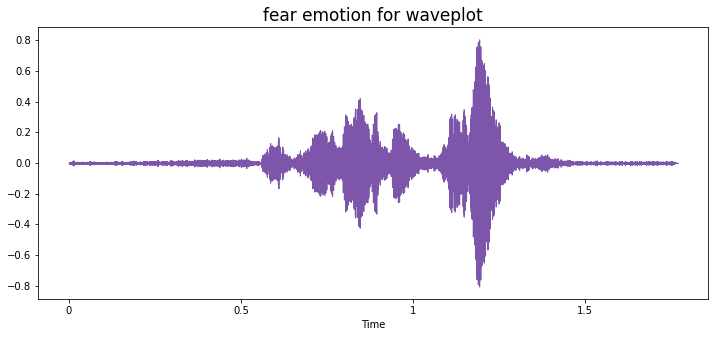

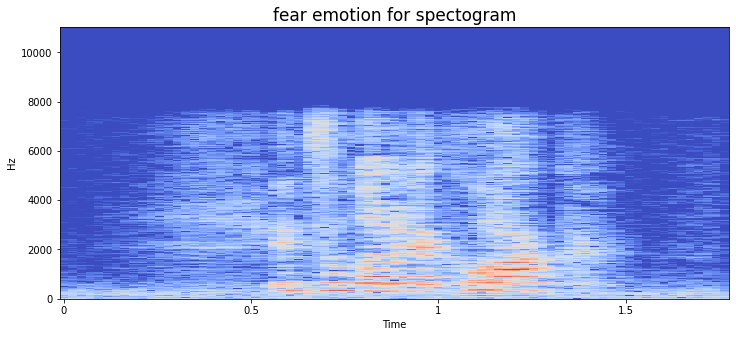

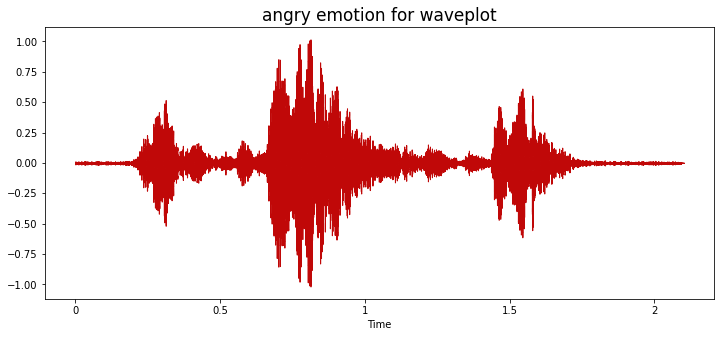

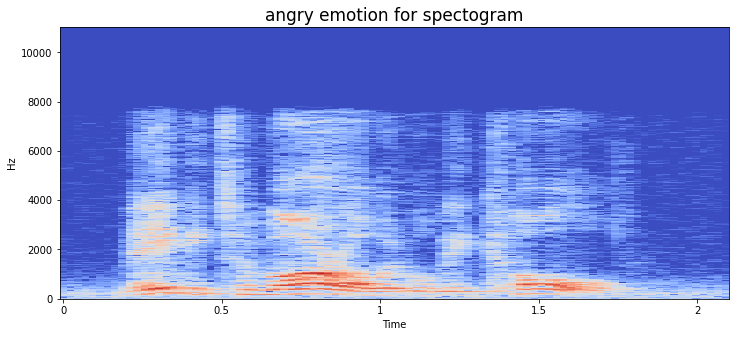

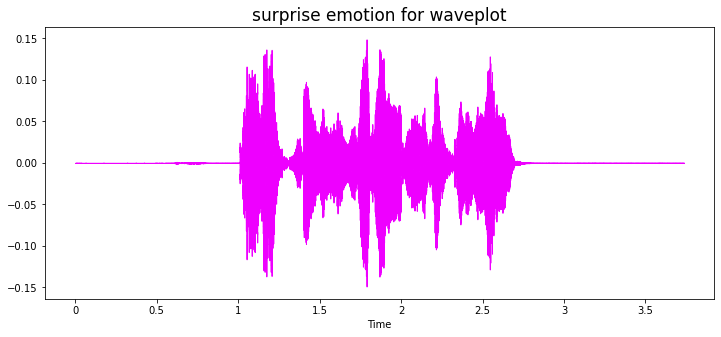

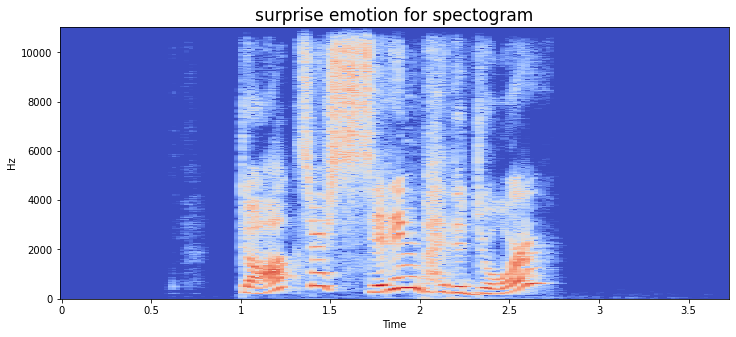

In [19]:
audio_path=[]
for emotion in emotion_names:
    path=np.array(main_df['File_Path'][main_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)

In [20]:
print('Disgust Audio Sample\n')
IPython.display.Audio(audio_path[0])

Disgust Audio Sample



In [21]:
print('Happy Audio Sample\n')
IPython.display.Audio(audio_path[1])

Happy Audio Sample



In [22]:
print('Sad Audio Sample\n')
IPython.display.Audio(audio_path[2])

Sad Audio Sample



In [23]:
print('Neutral Audio Sample\n')
IPython.display.Audio(audio_path[3])

Neutral Audio Sample



In [24]:
print('Fear Audio Sample\n')
IPython.display.Audio(audio_path[4])

Fear Audio Sample



In [25]:
print('Angry Audio Sample\n')
IPython.display.Audio(audio_path[5])

Angry Audio Sample



In [26]:
print('Surprise Audio Sample\n')
IPython.display.Audio(audio_path[6])

Surprise Audio Sample



<a id="7"></a>
## Audio Augmentation

In [27]:
def add_noise(data,random=False,rate=0.035,threshold=0.075):
    if random:
        rate=np.random.random()*threshold
    noise=rate*np.random.uniform()*np.amax(data)
    augmented_data=data+noise*np.random.normal(size=data.shape[0])
    return augmented_data

def shifting(data,rate=1000):
    augmented_data=int(np.random.uniform(low=-5,high=5)*rate)
    augmented_data=np.roll(data,augmented_data)
    return augmented_data

def pitching(data,sr,pitch_factor=0.7,random=False):
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(data,sr,pitch_factor)

def streching(data,rate=0.8):
    return librosa.effects.time_stretch(data,rate)
    

In [28]:
data,sr=librosa.load(audio_path[6])

<a id="4"></a>
### Orijinal Audio

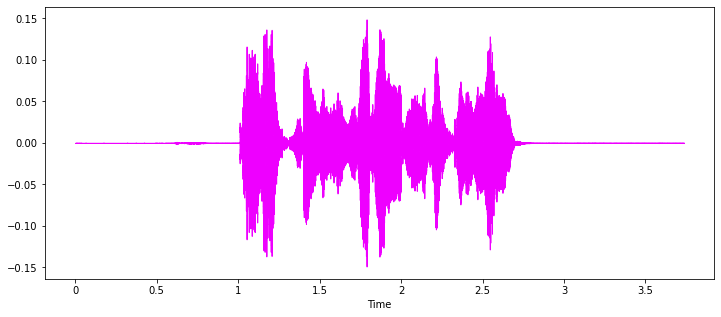

In [29]:
plt.figure(figsize=(12,5))
librosa.display.waveshow(data,sr,color='#EE00FF')
IPython.display.Audio(audio_path[6])

<a id="8"></a>
### Noised Audio

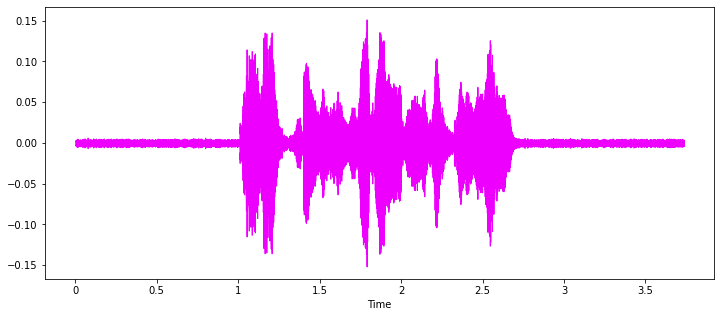

In [30]:
noised_audio=add_noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(noised_audio,sr,color='#EE00FF')
IPython.display.Audio(noised_audio,rate=sr)

<a id="10"></a>
### Streched Audio

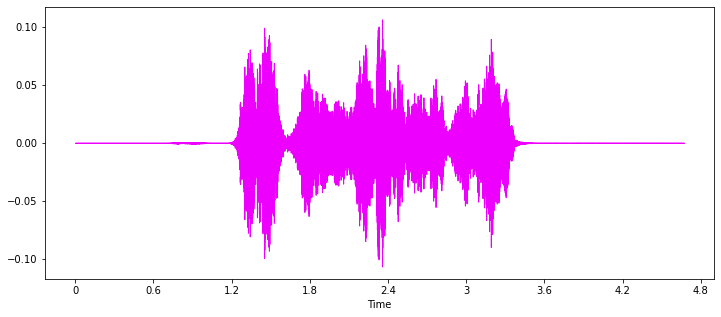

In [31]:
stretched_audio=streching(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(stretched_audio,sr,color='#EE00FF')
IPython.display.Audio(stretched_audio,rate=sr)

<a id="11"></a>
### Shifted Audio

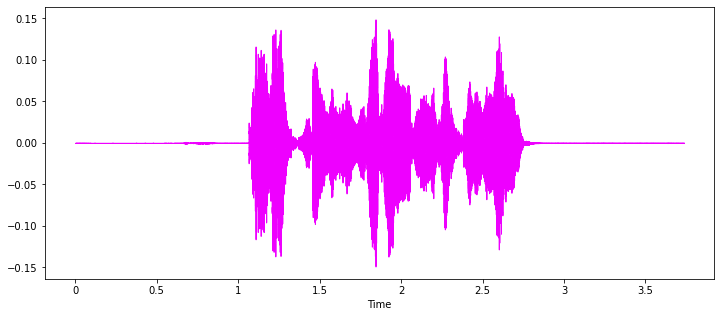

In [32]:
shifted_audio=shifting(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(shifted_audio,sr,color='#EE00FF')
IPython.display.Audio(shifted_audio,rate=sr)

<a id="12"></a>
### Pitched Audio

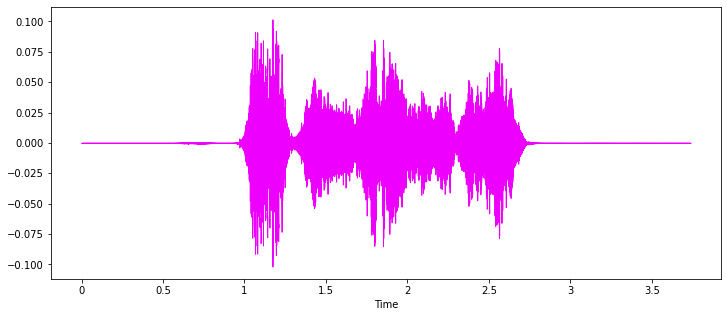

In [33]:
pitched_audio=pitching(data,sr)
plt.figure(figsize=(12,5))
librosa.display.waveshow(pitched_audio,sr,color='#EE00FF')
IPython.display.Audio(pitched_audio,rate=sr)

<a id="13"></a>
## Feature Extraction

In [34]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data,sr)
    audio=np.array(aud)
    
    noised_audio=add_noise(data,random=True)
    aud2=extract_features(noised_audio,sr)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitching(data,sr,random=True)
    aud3=extract_features(pitched_audio,sr)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitching(data,sr,random=True)
    pitched_noised_audio=add_noise(pitched_audio1,random=True)
    aud4=extract_features(pitched_noised_audio,sr)
    audio=np.vstack((audio,aud4))
    
    return audio

<a id="14"></a>
## Processing

In [35]:
X,Y=[],[]
for path,emotion,index in zip(main_df.File_Path,main_df.Emotion,range(main_df.File_Path.shape[0])):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')

0 audio has been processed


KeyboardInterrupt: 

In [37]:
processed_data_path='/kaggle/input/processed-data'

In [39]:
# Create DataFrame
extract = pd.DataFrame(X)
extract['Emotion'] = Y

# Save to CSV in /kaggle/working (writable)
processed_data_path = '/kaggle/working/processed_data.csv'
extract.to_csv(processed_data_path, index=False)

# Display first 10 rows
extract.head(10)


,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.121094,0.187012,0.234863,0.244629,0.244629,0.239746,0.231445,0.178711,0.123535,0.073730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
1,0.119141,0.186523,0.237793,0.256348,0.253418,0.246582,0.242188,0.186523,0.135254,0.085449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
2,0.118164,0.165527,0.214355,0.235840,0.238770,0.252930,0.230957,0.166016,0.113770,0.062988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
3,0.123535,0.175293,0.235352,0.256348,0.270508,0.292480,0.270996,0.208496,0.146973,0.092285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
4,0.016113,0.021484,0.029297,0.030762,0.033691,0.036133,0.038574,0.046875,0.054688,0.062500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,happy
5,0.015137,0.020508,0.028320,0.030762,0.033691,0.035156,0.037598,0.045898,0.053711,0.063477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,happy
6,0.017090,0.023438,0.032715,0.033691,0.038574,0.038086,0.041016,0.049316,0.053223,0.063965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,happy
7,0.018555,0.025879,0.037109,0.037109,0.042480,0.041992,0.046387,0.052246,0.059082,0.067871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,happy
8,0.013184,0.020020,0.026855,0.028809,0.026855,0.031250,0.036133,0.040527,0.050293,0.054199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,happy
9,0.137207,0.210449,0.280762,0.287598,0.301270,0.322754,0.324219,0.275879,0.222656,0.149902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,happy


<a id="15"></a>
# Including Analyzed Audio Features

In [40]:
df=pd.read_csv(processed_data_path)
df.shape

(856, 2377)

In [41]:
df=df.fillna(0)
print(df.isna().any())
df.shape

0          False
1          False
2          False
3          False
4          False
           ...  
2372       False
2373       False
2374       False
2375       False
Emotion    False
Length: 2377, dtype: bool


(856, 2377)

In [42]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.121094,0.187012,0.234863,0.244629,0.244629,0.239746,0.231445,0.178711,0.123535,0.073730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,disgust
1,0.119141,0.186523,0.237793,0.256348,0.253418,0.246582,0.242188,0.186523,0.135254,0.085449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,disgust
2,0.118164,0.165527,0.214355,0.235840,0.238770,0.252930,0.230957,0.166016,0.113770,0.062988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,disgust
3,0.123535,0.175293,0.235352,0.256348,0.270508,0.292480,0.270996,0.208496,0.146973,0.092285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,disgust
4,0.016113,0.021484,0.029297,0.030762,0.033691,0.036133,0.038574,0.046875,0.054688,0.062500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy
5,0.015137,0.020508,0.028320,0.030762,0.033691,0.035156,0.037598,0.045898,0.053711,0.063477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy
6,0.017090,0.023438,0.032715,0.033691,0.038574,0.038086,0.041016,0.049316,0.053223,0.063965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy
7,0.018555,0.025879,0.037109,0.037109,0.042480,0.041992,0.046387,0.052246,0.059082,0.067871,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy
8,0.013184,0.020020,0.026855,0.028809,0.026855,0.031250,0.036133,0.040527,0.050293,0.054199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy
9,0.137207,0.210449,0.280762,0.287598,0.301270,0.322754,0.324219,0.275879,0.222656,0.149902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy


<a id="16"></a>
# Processing Analyzed Data for Training

In [43]:
X=df.drop(labels='Emotion',axis=1)
Y=df['Emotion']

In [44]:
lb=LabelEncoder()
Y=np_utils.to_categorical(lb.fit_transform(Y))
print(lb.classes_)
Y

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad']


array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

<a id="17"></a>
## Train, Test and Validation Spliting

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((684, 2376), (172, 2376), (684, 6), (172, 6))

In [46]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=42,test_size=0.1,shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape,y_test.shape,y_val.shape

((615, 2376), (172, 2376), (69, 2376), (615, 6), (172, 6), (69, 6))

In [47]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((615, 2376), (172, 2376), (69, 2376), (615, 6), (172, 6), (69, 6))

In [48]:
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((615, 2376, 1), (172, 2376, 1), (69, 2376, 1))

<a id="18"></a>
## Tuning for Training

In [49]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [55]:
EPOCH=100
BATCH_SIZE=64

<a id="19"></a>
# Begin Training

In [56]:
model=tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(6,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 2376, 512)         3072      
_________________________________________________________________
batch_normalization_12 (Batc (None, 2376, 512)         2048      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 1188, 512)         0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 1188, 512)         1311232   
_________________________________________________________________
batch_normalization_13 (Batc (None, 1188, 512)         2048      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 594, 512)          0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 594, 256)         

In [57]:
history=model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_val,y_val), batch_size=BATCH_SIZE,callbacks=[early_stop,lr_reduction])

Epoch 1/100
10/10 [==============================] - 4s 189ms/step - loss: 2.5786 - accuracy: 0.3756 - val_loss: 4.8792 - val_accuracy: 0.2319
Epoch 2/100
10/10 [==============================] - 2s 163ms/step - loss: 1.1552 - accuracy: 0.5691 - val_loss: 2.4186 - val_accuracy: 0.3478
Epoch 3/100
10/10 [==============================] - 2s 163ms/step - loss: 0.8180 - accuracy: 0.6976 - val_loss: 3.5658 - val_accuracy: 0.3478
Epoch 4/100
10/10 [==============================] - 2s 162ms/step - loss: 0.5471 - accuracy: 0.8049 - val_loss: 3.9131 - val_accuracy: 0.3043
Epoch 5/100
10/10 [==============================] - 2s 162ms/step - loss: 0.3497 - accuracy: 0.8959 - val_loss: 4.4389 - val_accuracy: 0.2754
Epoch 6/100
10/10 [==============================] - 2s 163ms/step - loss: 0.2482 - accuracy: 0.9154 - val_loss: 3.9628 - val_accuracy: 0.2754
Epoch 7/100
10/10 [==============================] - 2s 163ms/step - loss: 0.1429 - accuracy: 0.9642 - val_loss: 3.6985 - val_accuracy: 0.2754

<a id="20"></a>
# Drawing Charts

<a id="21"></a>
## Accuracy Charts

In [71]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'


In [72]:
fig_acc = px.line(
    history.history,
    y=['accuracy', 'val_accuracy'],
    labels={'index': 'Epoch', 'value': 'Accuracy', 'variable': 'Metric'},
    title='Training vs Validation Accuracy'
)
fig_acc.show()



<a id="22"></a>
## Loss Charts

In [73]:
fig_loss = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'index': 'Epoch', 'value': 'Loss', 'variable': 'Metric'},
    title='Training vs Validation Loss'
)
fig_loss.show()


<a id="24"></a>
# Testing Model and Test Results

In [60]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([3, 1, 0, 1, 4, 4, 0, 1, 4, 4, 3, 5, 4, 0, 0, 4, 1, 0, 4, 4, 3, 0,
       4, 0, 4, 3, 0, 5, 5, 5, 1, 1, 3, 5, 3, 1, 2, 1, 2, 4, 5, 1, 0, 5,
       1, 5, 1, 2, 4, 3, 3, 3, 2, 0, 1, 5, 3, 0, 3, 1, 0, 5, 3, 1, 0, 5,
       4, 0, 2, 5, 3, 3, 2, 5, 3, 4, 1, 3, 1, 5, 1, 1, 4, 5, 4, 2, 1, 2,
       1, 0, 5, 4, 1, 0, 0, 1, 0, 3, 1, 4, 1, 1, 2, 5, 1, 2, 3, 4, 0, 5,
       1, 3, 0, 1, 3, 1, 1, 3, 2, 0, 2, 0, 2, 1, 4, 4, 2, 0, 2, 4, 3, 3,
       4, 2, 3, 1, 1, 3, 5, 3, 0, 2, 3, 0, 3, 2, 0, 0, 3, 5, 2, 2, 1, 0,
       0, 1, 3, 3, 1, 5, 2, 1, 3, 1, 5, 4, 4, 1, 1, 3, 1, 0])

In [61]:
y_check=np.argmax(y_test,axis=1)
y_check

array([3, 1, 0, 3, 4, 4, 0, 1, 3, 4, 3, 5, 4, 3, 0, 4, 1, 0, 4, 4, 3, 0,
       4, 2, 4, 3, 0, 5, 5, 5, 1, 1, 3, 5, 3, 1, 2, 1, 2, 4, 5, 1, 0, 4,
       1, 5, 1, 2, 4, 3, 3, 3, 2, 0, 1, 5, 3, 0, 3, 1, 0, 5, 3, 1, 0, 5,
       4, 0, 2, 5, 3, 3, 2, 5, 3, 4, 2, 3, 1, 5, 1, 1, 4, 1, 4, 2, 1, 2,
       3, 3, 5, 3, 1, 0, 0, 2, 0, 3, 1, 4, 1, 1, 2, 5, 1, 5, 3, 4, 0, 5,
       1, 3, 4, 0, 3, 1, 1, 0, 2, 0, 2, 0, 2, 1, 3, 4, 2, 0, 2, 4, 3, 3,
       4, 2, 3, 1, 1, 3, 5, 3, 0, 2, 3, 0, 3, 2, 0, 0, 3, 5, 3, 4, 1, 0,
       0, 1, 3, 3, 1, 5, 3, 1, 3, 1, 5, 4, 4, 1, 1, 3, 1, 0])

In [62]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 0.3845393657684326
Test Accuracy: 0.8895348906517029


<a id="25"></a>
## Confusion Matrix

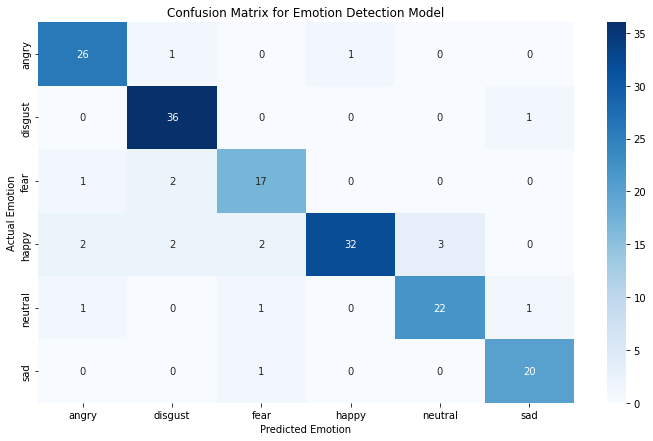

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ✅ Predict the labels from model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# ✅ True labels from one-hot to categorical
y_check = np.argmax(y_test, axis=1)

# ✅ Build confusion matrix
conf = confusion_matrix(y_check, y_pred)

# ✅ Ensure you're using correct class names
emotion_names = lb.classes_

# ✅ Convert to DataFrame for seaborn
cm = pd.DataFrame(conf,
                  index=[i for i in emotion_names],
                  columns=[i for i in emotion_names])

# ✅ Plotting
plt.figure(figsize=(12, 7))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_title('Confusion Matrix for Emotion Detection Model')
ax.set_xlabel('Predicted Emotion')
ax.set_ylabel('Actual Emotion')
plt.show()


In [65]:
print(f'Model Confusion Matrix\n',classification_report(y_check,y_pred,target_names=emotion_names))

Model Confusion Matrix
               precision    recall  f1-score   support

       angry       0.87      0.93      0.90        28
     disgust       0.88      0.97      0.92        37
        fear       0.81      0.85      0.83        20
       happy       0.97      0.78      0.86        41
     neutral       0.88      0.88      0.88        25
         sad       0.91      0.95      0.93        21

    accuracy                           0.89       172
   macro avg       0.89      0.89      0.89       172
weighted avg       0.89      0.89      0.89       172



In [ ]:
model_path = "./res_model.h5"

model.save(model_path)

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import joblib  # optional, to save encoders or scalers


In [75]:
# Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('accuracy_plot.png')  # 🔥 Save as image
plt.close()

# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('loss_plot.png')  # 🔥 Save as image
plt.close()


In [76]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf = confusion_matrix(y_check, y_pred)

# Define your emotion labels (6 emotions)
emotion_names = lb.classes_  # or manually: ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

# Create a dataframe
cm_df = pd.DataFrame(conf, index=emotion_names, columns=emotion_names)

# Plot and save
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix.png')  # 🔥 Save as image
plt.close()


In [77]:
model.save("emotion_model.h5")  # 🔥 Save trained model


In [78]:
# Save label encoder and scaler if needed later for inference
joblib.dump(lb, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']